<a href="https://colab.research.google.com/github/RealTaeYoungKang/CAU-AI4DeepLearning/blob/main/chapter05_fundamentals_of_ml_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 1s 0us/step


**Training the same model on MNIST data with noise channels or all-zero channels**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

In [5]:
model = get_model()
history_original = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 2.3156 - accuracy: 0.1016 - val_loss: 2.3076 - val_accuracy: 0.1068
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 2.2993 - accuracy: 0.1159 - val_loss: 2.3125 - val_accuracy: 0.0996
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.2922 - accuracy: 0.1244 - val_loss: 2.3146 - val_accuracy: 0.0993
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.2802 - accuracy: 0.1381 - val_loss: 2.3266 - val_accuracy: 0.0982
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.2653 - accuracy: 0.1489 - val_loss: 2.3407 - val_accuracy: 0.1057
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.2471 - accuracy: 0.1636 - val_loss: 2.3486 - val_accuracy: 0.1000
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.2240 - accuracy: 0.1796 - val_loss: 2.3682 - val_accuracy: 0.0943
Epoch 

**Plotting a validation accuracy comparison**

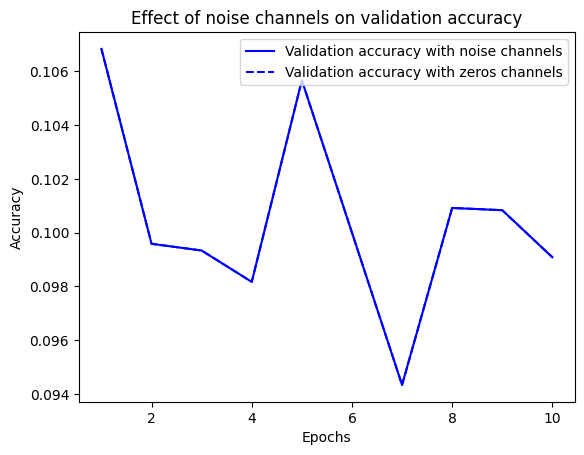

In [6]:
import matplotlib.pyplot as plt
val_acc_noise = history_original.history["val_accuracy"]
val_acc_zeros = history_original.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [8]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels) #y값을 섞을꺼임

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)
# val_accuracy가 향상되지 않는다 / but train_accuracy가 상승하는것을 알 수 있다 / traing을 주목하지 마라 val을 주목해라
model = get_model()
history = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3156 - accuracy: 0.1032 - val_loss: 2.3085 - val_accuracy: 0.1053
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2994 - accuracy: 0.1174 - val_loss: 2.3099 - val_accuracy: 0.1063
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2921 - accuracy: 0.1270 - val_loss: 2.3152 - val_accuracy: 0.1033
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2802 - accuracy: 0.1385 - val_loss: 2.3220 - val_accuracy: 0.1010
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2642 - accuracy: 0.1519 - val_loss: 2.3317 - val_accuracy: 0.1053
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2452 - accuracy: 0.1666 - val_loss: 2.3439 - val_accuracy: 0.1046
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2220 - accuracy: 0.1805 - val_loss: 2.3619 - val_accuracy: 0.1064

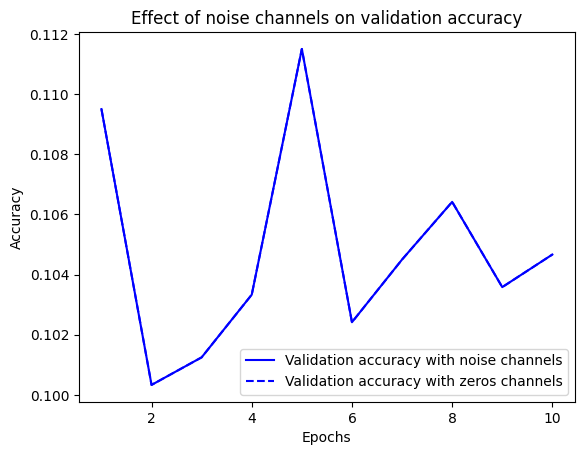

In [9]:
import matplotlib.pyplot as plt
val_acc_noise = history.history["val_accuracy"]
val_acc_zeros = history.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [12]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2), #이걸 수정하면 된다
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 0.3611 - accuracy: 0.9111 - val_loss: 0.1979 - val_accuracy: 0.9452
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1277 - accuracy: 0.9647 - val_loss: 0.1311 - val_accuracy: 0.9617
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0958 - accuracy: 0.9740 - val_loss: 0.1489 - val_accuracy: 0.9683
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0800 - accuracy: 0.9796 - val_loss: 0.1471 - val_accuracy: 0.9710
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0701 - accuracy: 0.9822 - val_loss: 0.1659 - val_accuracy: 0.9717
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0597 - accuracy: 0.9855 - val_loss: 0.1524 - val_accuracy: 0.9739
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0530 - accuracy: 0.9871 - val_loss: 0.1971 - val_accuracy: 0.9712
Epoch 

**The same model with a more appropriate learning rate**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [13]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.6731 - accuracy: 0.8318 - val_loss: 0.3610 - val_accuracy: 0.9020
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3535 - accuracy: 0.9029 - val_loss: 0.3096 - val_accuracy: 0.9147
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3181 - accuracy: 0.9114 - val_loss: 0.2941 - val_accuracy: 0.9197
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3021 - accuracy: 0.9159 - val_loss: 0.2840 - val_accuracy: 0.9224
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2925 - accuracy: 0.9182 - val_loss: 0.2789 - val_accuracy: 0.9221
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2854 - accuracy: 0.9205 - val_loss: 0.2756 - val_accuracy: 0.9240
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2809 - accuracy: 0.9215 - val_loss: 0.2713 - val_accuracy: 0.9265
Epoch 

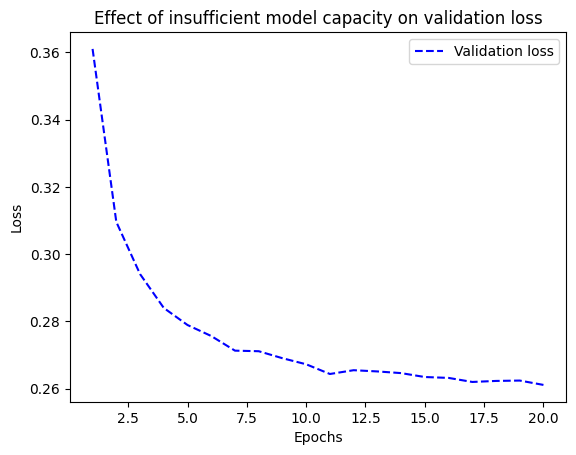

In [14]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [15]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3677 - accuracy: 0.8965 - val_loss: 0.2223 - val_accuracy: 0.9361
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1639 - accuracy: 0.9520 - val_loss: 0.1433 - val_accuracy: 0.9592
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1146 - accuracy: 0.9653 - val_loss: 0.1192 - val_accuracy: 0.9646
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0878 - accuracy: 0.9740 - val_loss: 0.0978 - val_accuracy: 0.9732
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0700 - accuracy: 0.9787 - val_loss: 0.0966 - val_accuracy: 0.9720
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0570 - accuracy: 0.9823 - val_loss: 0.0925 - val_accuracy: 0.9723
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0477 - accuracy: 0.9854 - val_loss: 0.0961 - val_accuracy: 0.9741
Epoch 

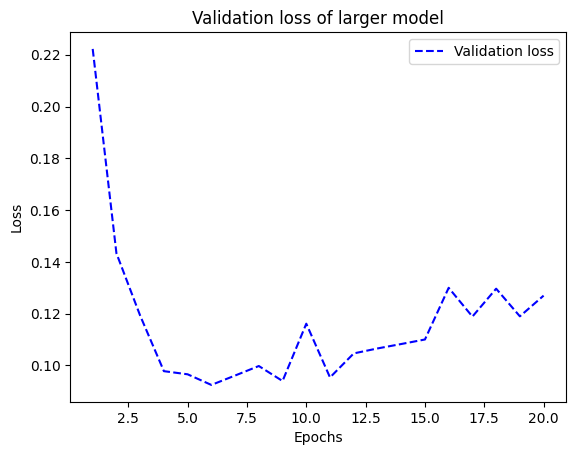

In [18]:
import matplotlib.pyplot as plt
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Validation loss of larger model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [19]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 1s 0us/step
Epoch 1/20
30/30 [==============================] - 3s 61ms/step - loss: 0.5421 - accuracy: 0.7744 - val_loss: 0.4145 - val_accuracy: 0.8706
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3364 - accuracy: 0.8924 - val_loss: 0.3319 - val_accuracy: 0.8771
Epoch 3/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2515 - accuracy: 0.9159 - val_loss: 0.2836 - val_accuracy: 0.8931
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2025 - accuracy: 0.9320 - val_loss: 0.2735 - val_accuracy: 0.8936
Epoch 5/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1672 - accuracy: 0.9460 - val_loss: 0.2782 - val_accuracy: 0.8914
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1431 - accuracy: 0.9551 - val_loss: 0.2856 - val_accuracy: 0.8884
Epoch 7/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1231 - accurac

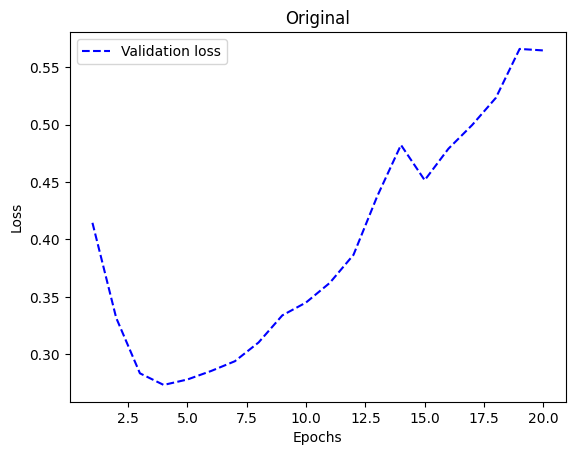

In [22]:
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Original")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

**Version of the model with lower capacity**

In [20]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 60ms/step - loss: 0.6321 - accuracy: 0.6957 - val_loss: 0.5732 - val_accuracy: 0.7225
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.5144 - accuracy: 0.8395 - val_loss: 0.4802 - val_accuracy: 0.8721
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.4232 - accuracy: 0.8921 - val_loss: 0.4117 - val_accuracy: 0.8841
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3520 - accuracy: 0.9136 - val_loss: 0.3624 - val_accuracy: 0.8871
Epoch 5/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2985 - accuracy: 0.9239 - val_loss: 0.3277 - val_accuracy: 0.8891
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2572 - accuracy: 0.9304 - val_loss: 0.3044 - val_accuracy: 0.8916
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2267 - accuracy: 0.9371 - val_loss: 0.2909 - val_accuracy: 0.8912
Epoch 8/20
30

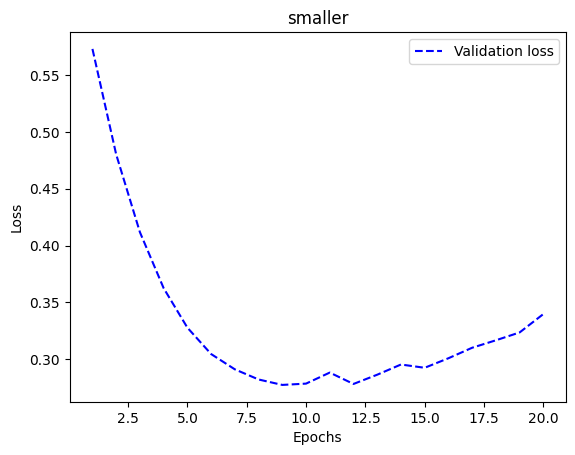

In [23]:
import matplotlib.pyplot as plt
val_loss = history_smaller_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("smaller")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

**Version of the model with higher capacity**

In [21]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 63ms/step - loss: 0.5799 - accuracy: 0.7331 - val_loss: 0.4373 - val_accuracy: 0.7925
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3248 - accuracy: 0.8678 - val_loss: 0.3343 - val_accuracy: 0.8603
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2356 - accuracy: 0.9069 - val_loss: 0.2757 - val_accuracy: 0.8865
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1949 - accuracy: 0.9239 - val_loss: 0.2747 - val_accuracy: 0.8904
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1511 - accuracy: 0.9419 - val_loss: 0.3032 - val_accuracy: 0.8823
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1178 - accuracy: 0.9567 - val_loss: 0.2840 - val_accuracy: 0.8878
Epoch 7/20
30/30 [==============================] - 0s 17ms/step - loss: 0.0751 - accuracy: 0.9757 - val_loss: 0.3446 - val_accuracy: 0.8855
Epoch 8/20
30

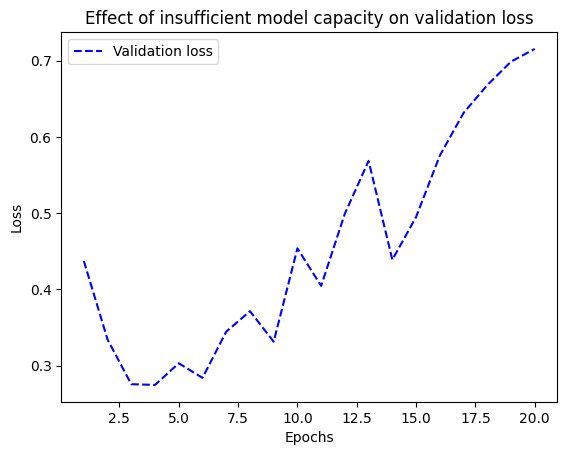

In [24]:
import matplotlib.pyplot as plt
val_loss = history_larger_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [25]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 60ms/step - loss: 0.6167 - accuracy: 0.7859 - val_loss: 0.4969 - val_accuracy: 0.8569
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.4224 - accuracy: 0.8857 - val_loss: 0.4151 - val_accuracy: 0.8711
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3432 - accuracy: 0.9079 - val_loss: 0.3905 - val_accuracy: 0.8733
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3041 - accuracy: 0.9217 - val_loss: 0.3681 - val_accuracy: 0.8813
Epoch 5/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2845 - accuracy: 0.9294 - val_loss: 0.3641 - val_accuracy: 0.8850
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2656 - accuracy: 0.9361 - val_loss: 0.3674 - val_accuracy: 0.8836
Epoch 7/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2554 - accuracy: 0.9409 - val_loss: 0.3670 - val_accuracy: 0.8832
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [26]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [27]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 61ms/step - loss: 0.6460 - accuracy: 0.6339 - val_loss: 0.5636 - val_accuracy: 0.7782
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.5579 - accuracy: 0.7752 - val_loss: 0.5012 - val_accuracy: 0.8702
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.4979 - accuracy: 0.8309 - val_loss: 0.4394 - val_accuracy: 0.8772
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.4458 - accuracy: 0.8561 - val_loss: 0.3921 - val_accuracy: 0.8871
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3940 - accuracy: 0.8787 - val_loss: 0.3774 - val_accuracy: 0.8785
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3478 - accuracy: 0.8957 - val_loss: 0.3326 - val_accuracy: 0.8885
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3121 - accuracy: 0.9089 - val_loss: 0.3109 - val_accuracy: 0.8883
Epoch 8/20
30

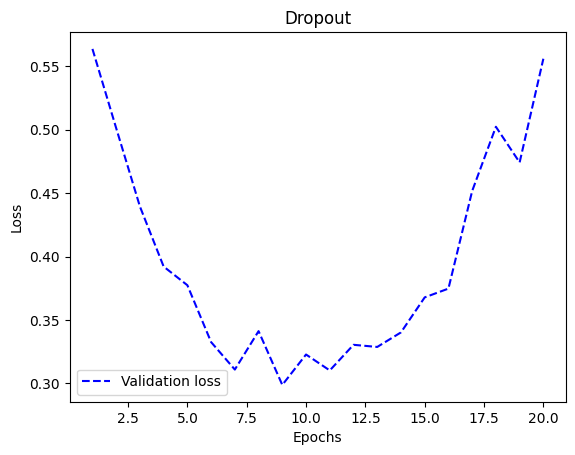

In [28]:
import matplotlib.pyplot as plt
val_loss = history_dropout.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Dropout")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Summary